<a href="https://colab.research.google.com/github/asupraja3/ml-ng-notebooks/blob/main/LogisticRegresssion_ScikitLearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ungraded Lab: Logistic Regression using Scikit-Learn

---

## Goals
In this lab you will:  
- Train a logistic regression model using **scikit-learn**  
- Evaluate its predictions and accuracy  

---

## Dataset
We will use the same small 2D dataset as in earlier labs.  
Each training example $x^{(i)} = [x_1^{(i)}, x_2^{(i)}]$ has two features, and labels are binary:  

$$ y^{(i)} \in \{0,1\} $$


In [2]:
import numpy as np

# Feature matrix X: shape (6, 2)
X = np.array([
    [0.5, 1.5],    # Example 1
    [1.0, 1.0],    # Example 2
    [1.5, 0.5],    # Example 3
    [3.0, 0.5],    # Example 4
    [2.0, 2.0],    # Example 5
    [1.0, 2.5]     # Example 6
]).astype(float)

# Labels y: shape (6,)
y = np.array([0, 0, 0, 1, 1, 1]).astype(float)


## Fit the Model

The logistic regression model computes:  

$$
\hat{y}^{(i)} = \sigma(w^\top x^{(i)} + b) \quad \text{where } \sigma(z) = \frac{1}{1 + e^{-z}}
$$

The decision boundary corresponds to:

$$
w^\top x + b = 0
$$

We will use **scikit-learn**’s `LogisticRegression` implementation.


In [3]:
from sklearn.linear_model import LogisticRegression

# Step 1: Create logistic regression model
lr_model = LogisticRegression()

# Step 2: Fit model on training data
lr_model.fit(X, y)


LogisticRegression()

## Make Predictions

Once trained, we can use the model to predict labels for the training set.  
This uses the **decision rule**:  

$$
\hat{y} =
\begin{cases}
1 & \text{if } \hat{y} \geq 0.5 \\
0 & \text{if } \hat{y} < 0.5
\end{cases}
$$

In [4]:
# Predict labels for the training set
y_pred = lr_model.predict(X)

# Print predictions
print("Predictions on training set:", y_pred)


Predictions on training set: [0. 0. 0. 1. 1. 1.]


## Calculate Accuracy

The accuracy is given by:  

$$
\text{Accuracy} = \frac{\text{Number of correct predictions}}{\text{Total number of examples}}
$$


In [5]:
# Calculate accuracy
accuracy = lr_model.score(X, y)

print("Accuracy on training set:", accuracy)


Accuracy on training set: 1.0


# 🔍 Additional Explorations
Now let’s go deeper and see:
- Predicted probabilities for each training example
- The decision boundary of the logistic regression classifier
- Model parameters (weights and bias)


Predicted probabilities (P(class=0), P(class=1)):
[[0.68521578 0.31478422]
 [0.66679559 0.33320441]
 [0.64785146 0.35214854]
 [0.32157091 0.67842909]
 [0.27963728 0.72036272]
 [0.39889156 0.60110844]]
Learned weights: [[0.90411349 0.73587543]]
Learned bias: [-2.33371631]


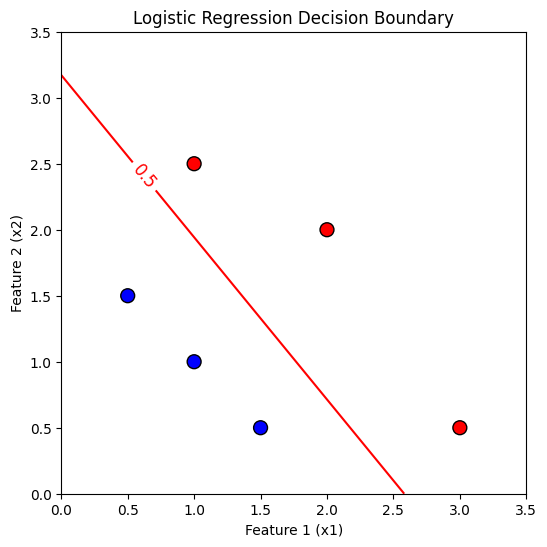

In [6]:
# predict_proba gives probabilities of belonging to class 0 and class 1
y_prob = lr_model.predict_proba(X)

print("Predicted probabilities (P(class=0), P(class=1)):")
print(y_prob)


# Logistic regression learns weights (w) and bias (b)
w = lr_model.coef_    # shape (1,2) since we have 2 features
b = lr_model.intercept_

print("Learned weights:", w)
print("Learned bias:", b)

import matplotlib.pyplot as plt

# Scatter plot of dataset
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c=y, cmap='bwr', edgecolors='k', s=100)
plt.xlabel("Feature 1 (x1)")
plt.ylabel("Feature 2 (x2)")
plt.title("Logistic Regression Decision Boundary")

# Create a grid of values
x1_vals = np.linspace(0, 3.5, 100)
x2_vals = np.linspace(0, 3.5, 100)
xx1, xx2 = np.meshgrid(x1_vals, x2_vals)

# Flatten grid and make predictions
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = lr_model.predict_proba(grid)[:,1].reshape(xx1.shape)

# Plot decision boundary (prob = 0.5 contour)
contour = plt.contour(xx1, xx2, probs, levels=[0.5], colors='red')
plt.clabel(contour, inline=True, fontsize=12)

plt.show()
